In [ ]:
# #connecting colab to drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
%matplotlib inline  
# style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
import random
from random import shuffle

from tqdm import tqdm
import cv2

from keras.utils import to_categorical
from keras.models import Sequential,load_model,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop,Adadelta,Adam,Adamax,SGD
from keras import backend as K
from keras.layers import Dropout,Flatten,AveragePooling2D,MaxPooling2D,Conv2D,Activation,BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#setting path to dataset 
curr_path = os.getcwd() + '/drive/My Drive/datasets'
data_path = curr_path+'/Large'

In [ ]:
#mapping of X and Y label matlab img and flower name
# imglist = list()


# for dr in os.listdir(data_path) :
#     if dr not in ['Traffic Light','Palm','Other','Mountain','Motorcycle','Hydrant','Crosswalk','Chimney','Car','Bus','Bridge','Bicycle'] :
#         continue
#     img_path = os.path.join(data_path,dr)
#     print(dr)
#     for img in tqdm(os.listdir(img_path) ):
#         path = os.path.join(img_path,img)
#         pic = cv2.imread(path)
#         pic = cv2.resize(pic,(96,96))
#         imglist.append([pic,dr])


imglist = list()


for dr in os.listdir(data_path) :
    if dr not in ['Traffic Light','Palm','Hydrant','Crosswalk','Car','Bus','Bicycle'] :
        continue
    img_path = os.path.join(data_path,dr)
    print(dr)
    for img in tqdm(os.listdir(img_path) ):
        path = os.path.join(img_path,img)
        pic = cv2.imread(path)
        pic = cv2.resize(pic,(96,96))
        
        imglist.append([pic,dr])

Bus


100%|██████████| 1229/1229 [00:21<00:00, 56.96it/s] 


Car


100%|██████████| 3578/3578 [00:53<00:00, 66.53it/s] 


Crosswalk


100%|██████████| 1260/1260 [00:16<00:00, 77.85it/s] 


Hydrant


100%|██████████| 972/972 [00:13<00:00, 72.64it/s] 


Bicycle


100%|██████████| 800/800 [00:08<00:00, 89.05it/s] 


Traffic Light


100%|██████████| 811/811 [00:10<00:00, 74.65it/s] 


Palm


100%|██████████| 932/932 [00:11<00:00, 83.77it/s] 


In [ ]:
X,y_temp = map(list,zip(*imglist))

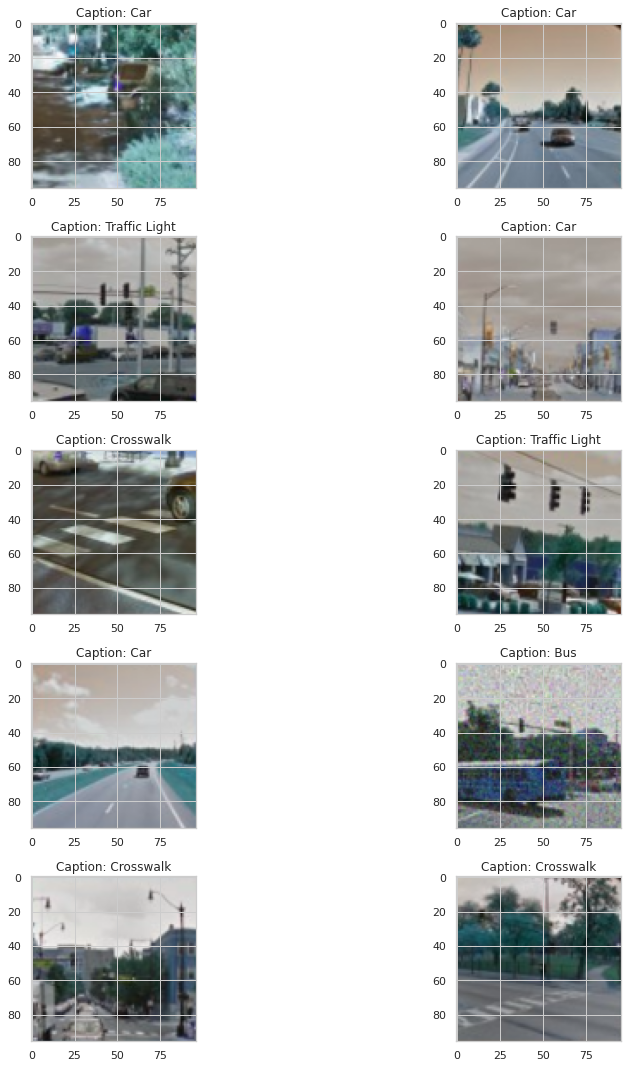

In [ ]:
# just checking if x and y are mapped correctly
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(y_temp))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Caption: '+y_temp[l])
        
plt.tight_layout()

In [ ]:
  #le -> performing one hot encoding( # [1,0,0,0,0], [0,1,0,0,0])
  le = LabelEncoder()
  Y = le.fit_transform(y_temp)
  Y = to_categorical(Y,12)

  # normalization of the X-label between 0 and 1
  X=np.array(X)
  X=X/255

In [ ]:
X_original = X
from sklearn.decomposition import PCA

In [ ]:
def calculate_pca(X,j):
  pca_X = PCA(n_components=j)
  return pca_X.fit(X)

In [ ]:
def calculate_cumsum(X,j):
  pca_X = calculate_pca(X,j)
  exp_var = pca_X.explained_variance_ratio_ * 100
  return np.cumsum(exp_var)

In [ ]:
def average_of_components(X,j):
  b, g, r = cv2.split(X)

  cum_exp_var_r = calculate_cumsum(r,j)
  cum_exp_var_g = calculate_cumsum(g,j)
  cum_exp_var_b = calculate_cumsum(b,j)

  return (cum_exp_var_r[j-1] + cum_exp_var_r[j-1] + cum_exp_var_r[j-1])/3


In [ ]:
# from time import sleep
# from tqdm import tqdm
# for i in range(1,16):
#   average = 0
#   for j in tqdm(range(len(X))):
#     average += average_of_components(X[j],i)
#   print("Components: ",i,"\nAverage: ",average/len(X))
  
#   plt.figure(figsize=[7, 10])

  # plt.bar(range(1, 16), exp_var, align='center',
          # label='Individual explained variance')

  # plt.step(range(1, 16), average, where='mid',
  #         label='Cumulative explained variance', color='red')

  # plt.ylabel('Explained variance percentage')
  # plt.xlabel('Principal component index')
  # plt.legend(loc='right')
  # plt.title("PCA for Red Color Channel")
  # plt.tight_layout()

# for i in range(1,11):
#   average = 0
#   for j in range(len(X)):
#     average += average_of_components(X[j],i)
  
#   print("Components: ",i,"\nAverage: ",average/len())

100%|██████████| 9582/9582 [01:59<00:00, 80.47it/s]


Components:  1 
Average:  54.33862563371581


100%|██████████| 9582/9582 [01:50<00:00, 86.63it/s]


Components:  2 
Average:  70.26768854980064


100%|██████████| 9582/9582 [01:52<00:00, 84.97it/s]


Components:  3 
Average:  78.34200288878046


100%|██████████| 9582/9582 [01:51<00:00, 85.85it/s]


Components:  4 
Average:  83.27621432437246


100%|██████████| 9582/9582 [01:51<00:00, 86.25it/s]


Components:  5 
Average:  86.62917217589225


100%|██████████| 9582/9582 [01:52<00:00, 84.81it/s]


Components:  6 
Average:  89.04522836658455


100%|██████████| 9582/9582 [01:48<00:00, 88.45it/s]


Components:  7 
Average:  90.861363125854


100%|██████████| 9582/9582 [01:51<00:00, 86.17it/s]


Components:  8 
Average:  92.26762944346142


100%|██████████| 9582/9582 [01:52<00:00, 85.17it/s]


Components:  9 
Average:  93.382474383949


100%|██████████| 9582/9582 [01:49<00:00, 87.49it/s]


Components:  10 
Average:  94.2852081375047


100%|██████████| 9582/9582 [01:53<00:00, 84.51it/s]


Components:  11 
Average:  95.02603857803668


100%|██████████| 9582/9582 [01:50<00:00, 86.91it/s]


Components:  12 
Average:  95.64376132583085


100%|██████████| 9582/9582 [01:54<00:00, 83.89it/s]


Components:  13 
Average:  96.16316600112498


100%|██████████| 9582/9582 [01:53<00:00, 84.53it/s]


Components:  14 
Average:  96.60515423073068


100%|██████████| 9582/9582 [01:50<00:00, 86.88it/s]

Components:  15 
Average:  96.98387898929475


<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

In [ ]:
def pca_trans(X,j):
  pca_X = PCA(n_components=j)
  return pca_X.fit_transform(X)

In [ ]:
def pca_original(X,j):
  pca_X = PCA(n_components=j)
  return pca_X.inverse_transform(pca_X.fit_transform(X))

In [ ]:
def get_image(r,g,b):
  return cv2.merge((b, g, r))

In [ ]:
num_comps = 12
for i in tqdm(range(len(X))):
  b, g, r = cv2.split(X[i])
  pca_r = pca_original(r,num_comps)
  pca_g = pca_original(g,num_comps)
  pca_b = pca_original(b,num_comps)

  X[i] = get_image(pca_r, pca_g, pca_b)

100%|██████████| 9582/9582 [01:56<00:00, 82.20it/s]


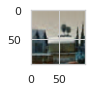

In [ ]:
plt.figure(figsize=[1,1])
plt.imshow(X[2])

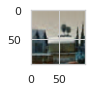

In [ ]:
plt.figure(figsize=[1,1])
plt.imshow(X_original[2])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [ ]:
# np.random.seed(42)
# random.seed(42)
# tf.random.set_seed(42)

In [ ]:
#making cnn model

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),input_shape=(96,96,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=96,kernel_size=(2,2),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(12,activation='softmax'))

In [ ]:
# setting batch_size nd epooch for training the model
batch_size = 128
epooch = 50

# red_lr = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
# data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 96)        24672     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 96)       0

In [ ]:
# training of the model
import time
start = time.perf_counter()
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epooch, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
end = time.perf_counter()
# hist = model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epooch,callbacks=red_lr,validation_data=(x_test,y_test),steps_per_epoch=x_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
59/59 [==============================] - 28s 328ms/step - loss: 1.7725 - accuracy: 0.3564 - val_loss: 1.4970 - val_accuracy: 0.4189
Epoch 2/50
59/59 [==============================] - 21s 348ms/step - loss: 1.4071 - accuracy: 0.4649 - val_loss: 1.2559 - val_accuracy: 0.5232
Epoch 3/50
59/59 [==============================] - 18s 311ms/step - loss: 1.2712 - accuracy: 0.5128 - val_loss: 1.1685 - val_accuracy: 0.5608
Epoch 4/50
59/59 [==============================] - 19s 313ms/step - loss: 1.1607 - accuracy: 0.5628 - val_loss: 1.0267 - val_accuracy: 0.6098
Epoch 5/50
59/59 [==============================] - 19s 318ms/step - loss: 1.0850 - accuracy: 0.5904 - val_loss: 0.9141 - val_accuracy: 0.6448
Epoch 6/50
59/59 [==============================] - 19s 326ms/step - loss: 1.0039 - accuracy: 0.6257 - val_loss: 0.9580 - val_accuracy: 0.6338
Epoch 7/50
59/59 [==============================] - 19s 313ms/step - loss: 0.9961 - accuracy: 0.6284 - val_loss: 0.9193 - val_accuracy: 0.6526

In [ ]:
print("Time taken: ",end-start)

Time taken:  1021.3745609770001


In [ ]:
# saving the model
model.save_weights(os.path.join(curr_path ,'cnn_pca.h5'))

with open(os.path.join(curr_path,"cnn_pca.json"), "w") as json_file:
    json_file.write(model.to_json())

In [ ]:
# plt.plot(History.history['loss'])
# plt.plot(History.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epochs')
# plt.legend(['train', 'test'])
# plt.show()

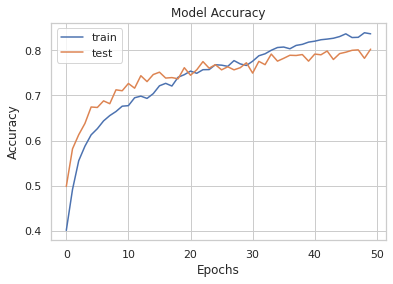

In [ ]:
#accuracy graph of our model
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
#import our model from json
with open(os.path.join(curr_path,'cnn_pca.json'), 'r') as f:
    loaded_model_json = f.read()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(os.path.join(curr_path,"cnn_pca.h5"))

In [ ]:
# some debugging
pred = loaded_model.predict(x_test)
pred_final = np.argmax(pred,axis=1)
pred_final=pred_final.reshape(1917,1)
pos = 0
for i in range(1917):
  if y_test[i][pred_final[i]] == 1:
    pos += 1
accuracy = pos/len(y_test)
accuracy*100

60/60 [==============================] - 0s 5ms/step


79.86437141366719

['Traffic Light']
[array([6])]
6
Traffic Light


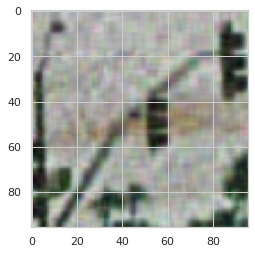

In [ ]:
# print(le.inverse_transform(y_test[0]),pred_final[0])
d = {0:'Bicycle',1:'Bus',2:'Car',3:'Crosswalk',4:'Hydrant',5:'Palm',6:'Traffic Light'}
print(str(le.inverse_transform([pred_final[200]])))
print(str([pred_final[200]]))
print(np.argmax([y_test[200]]))
print(d[np.argmax([y_test[200]])])
plt.imshow(x_test[200])

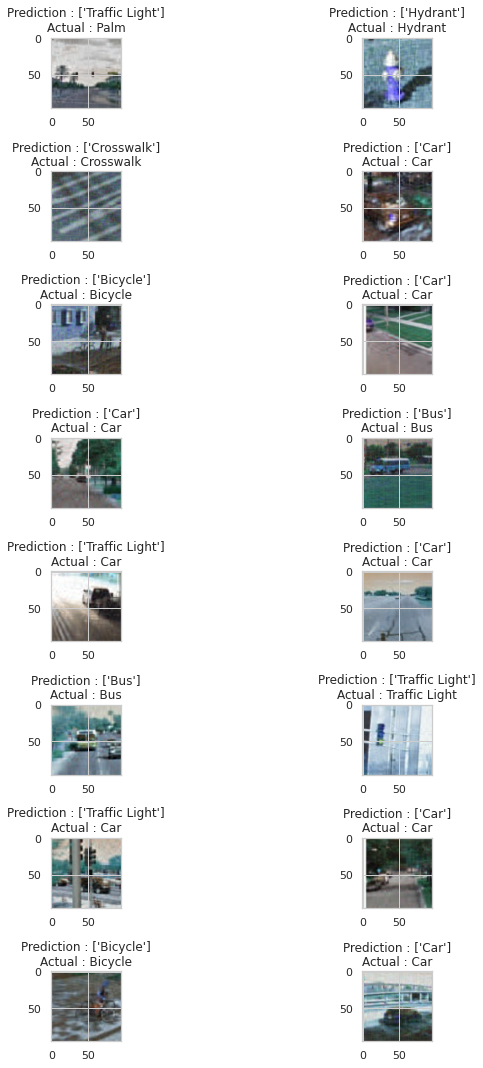

In [ ]:
# checking our result. Comparing some of the predicted and test values
count=0
fig,ax=plt.subplots(8,2)
fig.set_size_inches(15,15)
for i in range (8):
    for j in range (2):
        ax[i,j].imshow(x_test[count])
        ax[i,j].set_title("Prediction : "+str(le.inverse_transform([pred_final[count]]))+"\n"+"Actual : "+d[np.argmax([y_test[count]])])
        plt.tight_layout()
        count+=2